# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso

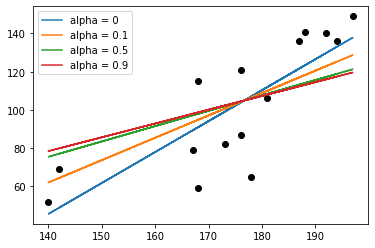

In [2]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x1 = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0, 0.1, 0.5, 0.9]
plt.scatter(x, y, c='k')

for alpha in alphas:
    w = np.linalg.inv(x1.T*x1 + alpha * I)*x1.T*y
    w=w.ravel()
    plt.plot(x, x*w[0,1]+w[0,0], label="alpha = "+str(alpha))
plt.legend()
plt.show()

## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [3]:
def sgd(x, y, alpha=0.1, lr=1e-4, epochs=10):
    m, n = x.shape
    w = np.ones((n, 1))
    for epoch in range(epochs):
        for i in range(m):
            xi = x[i:i+1]
            yi = y[i:i+1]
            loss = yi - np.dot(xi, w)
            grad = -2 * (np.dot(xi.T, loss) + alpha * np.sign(w))/m
            w -= lr * grad
    return w

In [4]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 

# Training using SGD
w = sgd(x, y, alpha=alpha, lr=1e-4, epochs=10)
w=w.ravel()
print("Weights using SGD:", w)

# Using sklearn Lasso regression
lasso = Lasso(alpha=alpha, max_iter=10000)
lasso.fit(x[:,1:], y)
print("Weights using sklearn Lasso:", np.hstack((lasso.intercept_, lasso.coef_)))

Weights using SGD: [0.99480587 0.60510611]
Weights using sklearn Lasso: [-180.8579086     1.61776499]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)','sepal length (cm)']].values.reshape(-1, 2)
y = iris_df[['petal width (cm)','petal length (cm)']].values.reshape(-1, 2)

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b